In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 0, 10,  6,  7,  8,  3,  2,  5,  4]), tensor([1, 9]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[3.3898],
        [3.6825]], grad_fn=<AddmmBackward>)

In [6]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.6505]], requires_grad=True), Parameter containing:
 tensor([-0.2466], requires_grad=True))

In [7]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.4039],
        [0.4039],
        [0.4039],
        [0.4039],
        [0.4039],
        [0.4039],
        [0.4039],
        [0.4039],
        [0.4039],
        [0.4039]], grad_fn=<AddmmBackward>)

In [8]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [9]:
linear_model.parameters()

<generator object Module.parameters at 0x00000167508D9748>

In [10]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.2368]], requires_grad=True), Parameter containing:
 tensor([0.9956], requires_grad=True)]

In [11]:
def training_loop(epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, epochs + 1):
        pred_t_train = model(t_u_train)
        loss_train = loss_fn(pred_t_train, t_c_train)
        
        pred_t_val = model(t_u_val)
        loss_val = loss_fn(pred_t_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f},'
                  f' Validation loss {loss_val.item():.4f}')

In [12]:
def loss_fn(pred_t, actual_t):
    squared_diffs = (pred_t - actual_t)**2
    return squared_diffs.mean()

In [13]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(epochs=3000, optimizer=optimizer, model=linear_model, loss_fn=loss_fn, t_u_train=t_un_train, t_u_val=t_un_val, t_c_train=t_c_train, t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 176.8847, Validation loss 172.0001
Epoch 1000, Training loss 3.3678, Validation loss 2.8835
Epoch 2000, Training loss 2.8847, Validation loss 3.1994
Epoch 3000, Training loss 2.8769, Validation loss 3.2408

Parameter containing:
tensor([[5.4131]], requires_grad=True)
Parameter containing:
tensor([-17.4391], requires_grad=True)


In [14]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 197.6950, Validation loss 191.8307
Epoch 1000, Training loss 3.4519, Validation loss 2.8548
Epoch 2000, Training loss 2.8860, Validation loss 3.1956
Epoch 3000, Training loss 2.8770, Validation loss 3.2403

Parameter containing:
tensor([[5.4126]], requires_grad=True)
Parameter containing:
tensor([-17.4363], requires_grad=True)


In [15]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [16]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [17]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [18]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [19]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [20]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1244], requires_grad=True)

In [21]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 180.4733, Validation loss 171.3642
Epoch 1000, Training loss 6.8048, Validation loss 3.2853
Epoch 2000, Training loss 2.4942, Validation loss 7.4497
Epoch 3000, Training loss 1.4098, Validation loss 5.3667
Epoch 4000, Training loss 1.2883, Validation loss 5.3616
Epoch 5000, Training loss 1.2546, Validation loss 5.4122
output tensor([[11.4023],
        [14.7941]], grad_fn=<AddmmBackward>)
answer tensor([[14.],
        [13.]])
hidden tensor([[-4.9699e-02],
        [-1.1144e+01],
        [-4.7634e-03],
        [ 1.4403e+00],
        [-1.2010e+01],
        [ 1.3286e+00],
        [ 5.3230e-01],
        [ 9.4737e+00]])


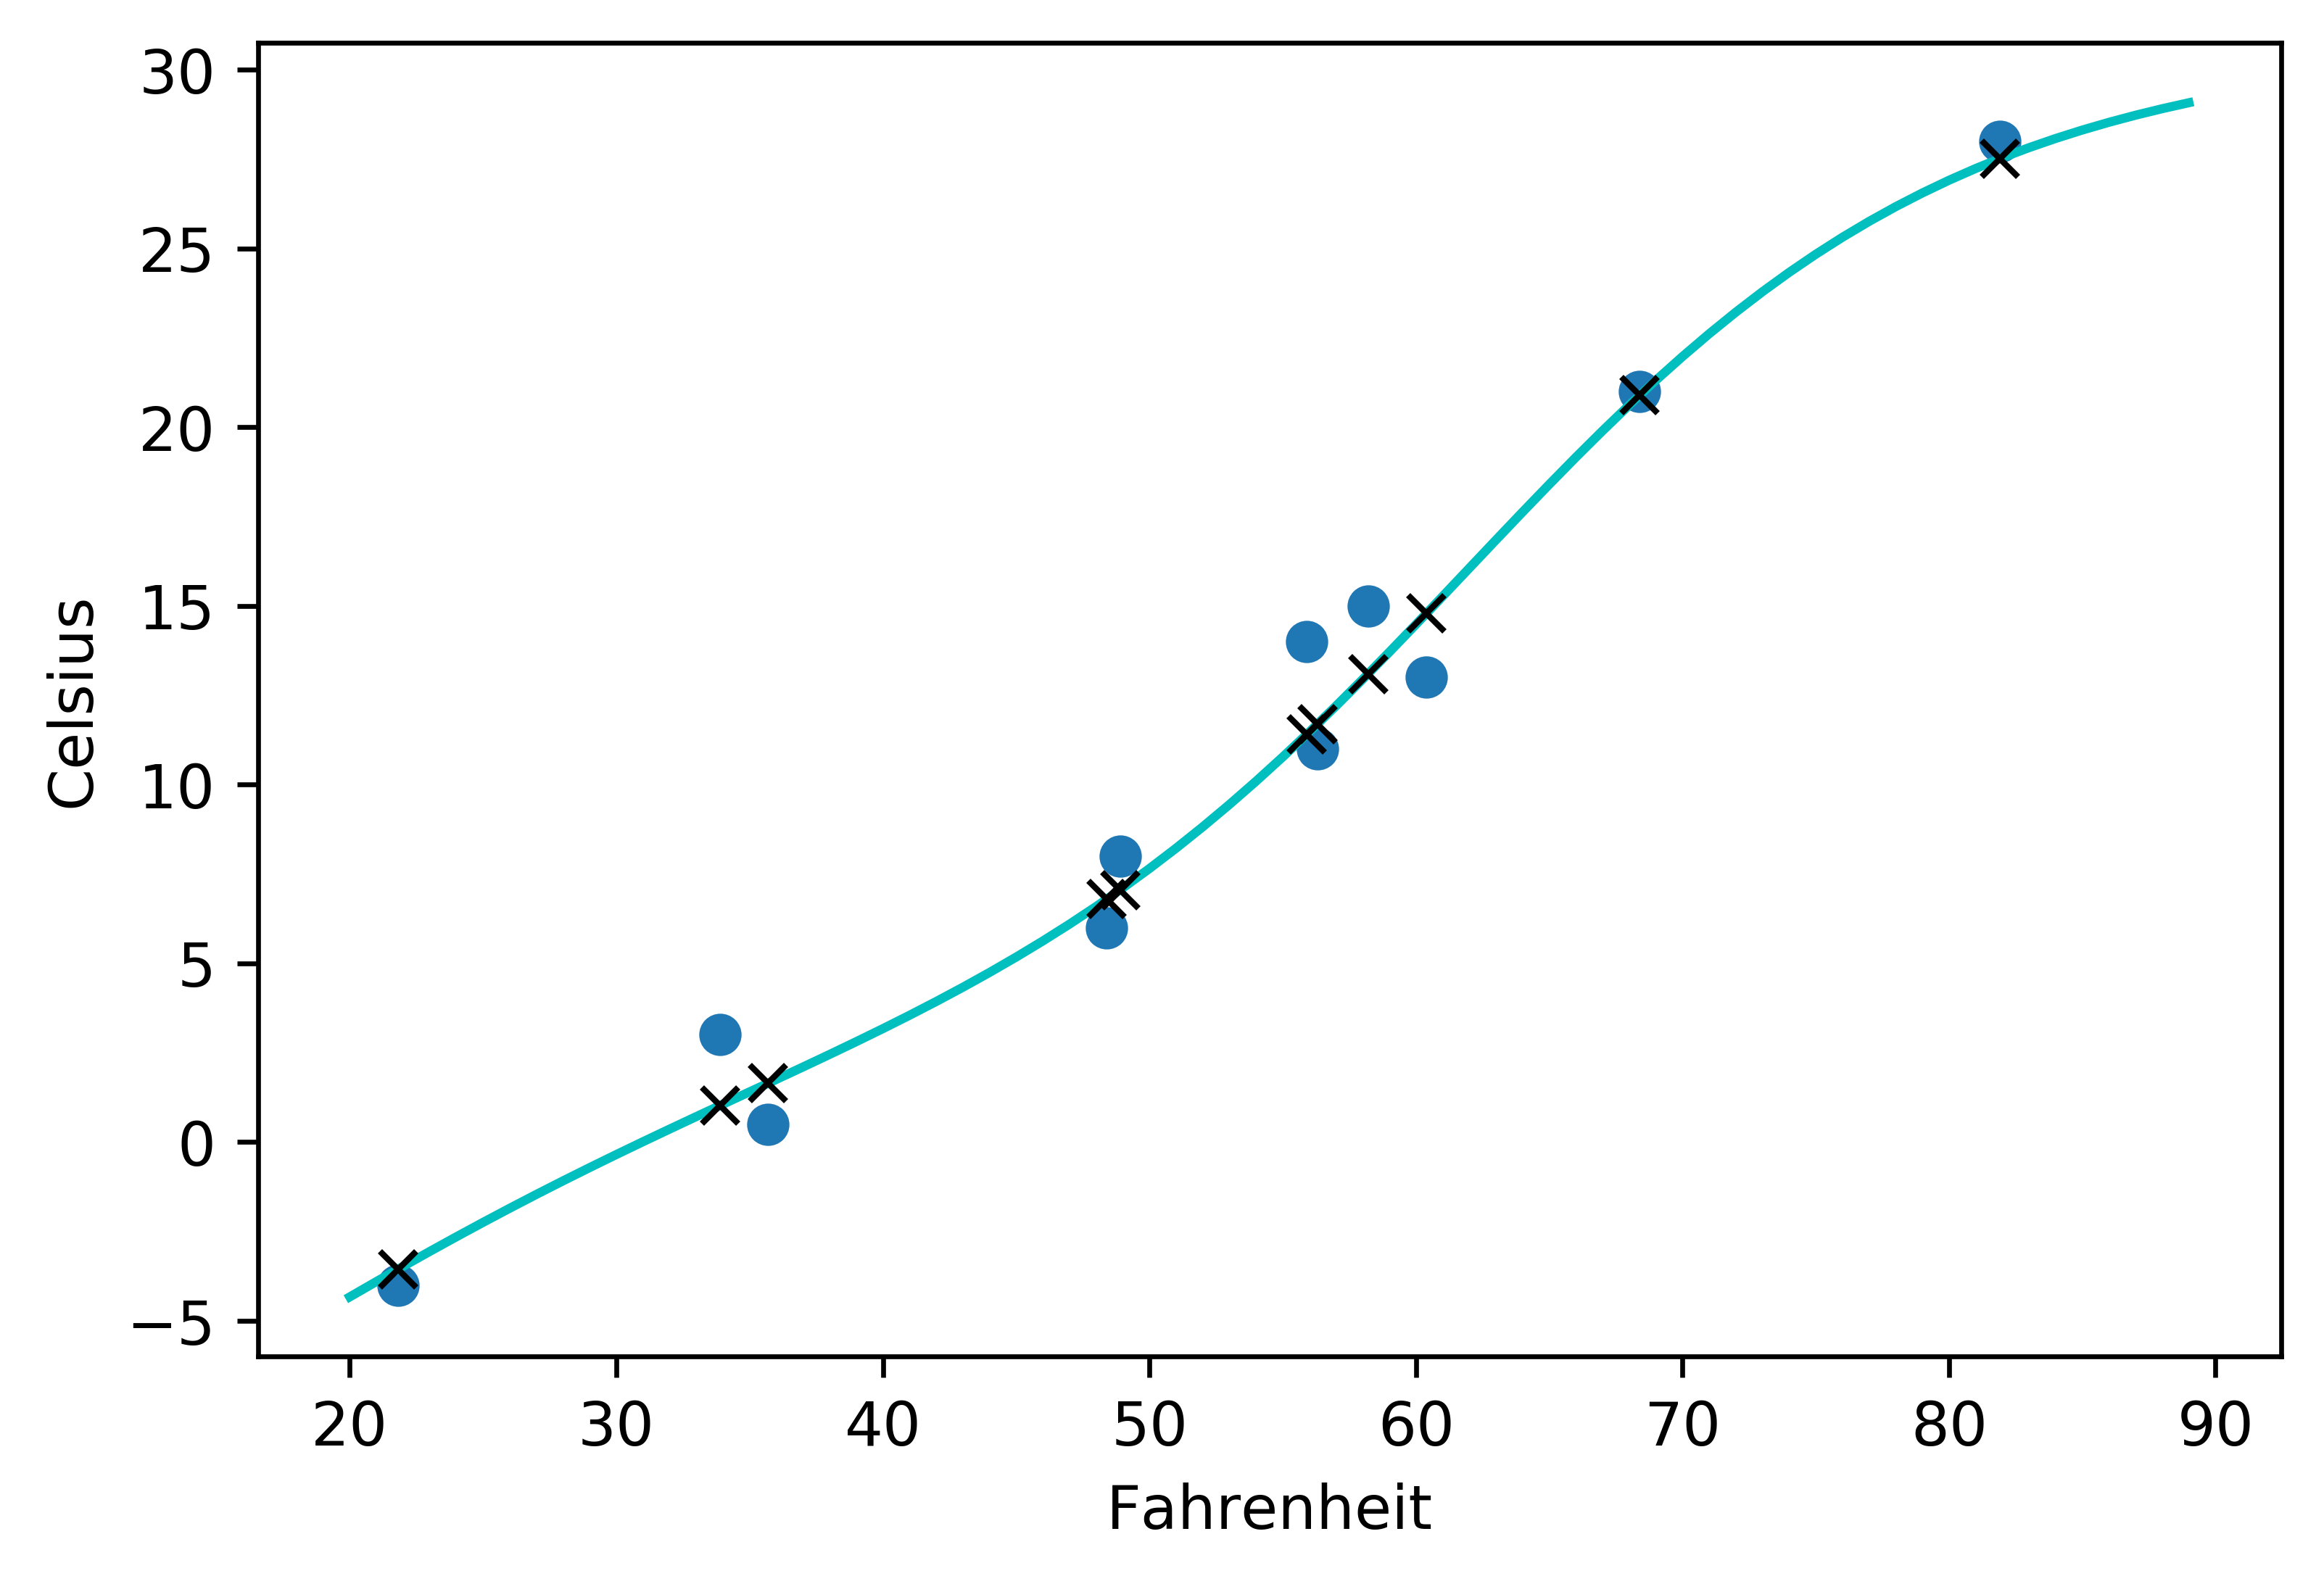

In [23]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.show()